In [1]:
import requests # requests機能をインポートします。
REQUEST_URL = 'https://travel.rakuten.co.jp/yado/okinawa/nahashi.html' #アクセス先をREQUEST_URLを代入します。
res = requests.get(REQUEST_URL) #リクエストしたデータをresに代入します。
res.encoding = 'utf-8' # resの文字データがISO-8859-1なので、utf-8に変換して文字化けを防止します。

In [2]:
from bs4 import BeautifulSoup # BeautifulSoupの機能をインポートします。
soup = BeautifulSoup(res.text,"html.parser") # BeautifulSoup(解析したいデータ,解析する方法)を指定し、解析したデータをsoupに代入します。

In [3]:
hotel_section = soup.select("section")[2]    # html全体を格納しているsoupからsectionというcssセレクタを使って抽出

In [4]:
print(hotel_section.select_one("h1 a"))   # sctionの３番目のhtmlを格納しているsoupからh1 aというcssセレクタを使って抽出
print(hotel_section.select_one("p.htlPrice span"))   # sctionの３番目のhtmlを格納しているsoupからp.htlPrice spanというcssセレクタを使って抽出
print(hotel_section.select_one("p.cstmrEvl strong"))   # sctionの３番目のhtmlを格納しているsoupからp.cstmrEvl strongというcssセレクタを使って抽出
print(hotel_section.select_one("p.htlAccess"))   # sctionの３番目のhtmlを格納しているsoupからp.htlAccessというcssセレクタを使って抽出

<a href="https://travel.rakuten.co.jp/HOTEL/182439/182439.html?l-id=hotelList_ad_L000002979_3_182439">ネストホテル那覇久茂地</a>
<span>2,591円〜</span>
<strong>4.65</strong>
<p class="htlAccess">
           〒900-0015　沖縄県那覇市久茂地2-22-5<a class="thickbox" data-ratevent="click" data-ratid="hotelList_ad_L000002979_3_182439_mapClick" data-ratparam="all" href="//travel.rakuten.co.jp/share/gmap/map.html?f_longitude=127.6822461&amp;f_latitude=26.2195155&amp;TB_iframe=true&amp;height=450&amp;width=600" title="ネストホテル那覇久茂地">[地図を見る]</a>
</p>


In [5]:
hotelName = hotel_section.select_one("h1 a")
hotelMinCharge = hotel_section.select_one("p.htlPrice span")
reviewAverage = hotel_section.select_one("p.cstmrEvl strong")
hotel_locate = hotel_section.select_one("p.htlAccess")

In [6]:
hotel_section.select_one("h1 a").text

'ネストホテル那覇久茂地'

In [7]:
hotel_section.select_one("h1 a")["href"]

'https://travel.rakuten.co.jp/HOTEL/182439/182439.html?l-id=hotelList_ad_L000002979_3_182439'

In [8]:
hotel_locate.text

'\n           〒900-0015\u3000沖縄県那覇市久茂地2-22-5[地図を見る]\n'

In [11]:
print(hotelName.text)
print(hotelMinCharge.text.replace("円〜","").replace(",",""))
print(reviewAverage.text)
print(hotel_locate.text.replace("\n","").replace(" ","").replace("[地図を見る]","").replace("　",""))

ネストホテル那覇久茂地
2591
4.65
〒900-0015沖縄県那覇市久茂地2-22-5


In [13]:
# h1.premium_normal aにホテルの名前があるので、このcssセレクタを利用してみましょう。
soup.select_one('h1.premium_normal a') # .select_one('ここにcssセレクタ')で抽出できます
hotel_name = soup.select('h1.premium_normal a')
len(hotel_name) #len(ここに要素を数えたい配列)で数を表示

print(hotel_name)
print(len(hotel_name))


[<a href="https://travel.rakuten.co.jp/HOTEL/171943/171943.html?l-id=hotelList_12_171943">沖縄かりゆしリゾートエグゼス那覇＜県庁前＞</a>, <a href="https://travel.rakuten.co.jp/HOTEL/181785/181785.html?l-id=hotelList_14_181785">ヒューイットリゾート那覇</a>, <a href="https://travel.rakuten.co.jp/HOTEL/176757/176757.html?l-id=hotelList_17_176757">沖縄ハーバービューホテル</a>, <a href="https://travel.rakuten.co.jp/HOTEL/167519/167519.html?l-id=hotelList_20_167519">ノボテル沖縄那覇</a>, <a href="https://travel.rakuten.co.jp/HOTEL/136808/136808.html?l-id=hotelList_24_136808">リーガロイヤルグラン沖縄</a>, <a href="https://travel.rakuten.co.jp/HOTEL/148000/148000.html?l-id=hotelList_26_148000">ハイアットリージェンシー那覇沖縄</a>, <a href="https://travel.rakuten.co.jp/HOTEL/16443/16443.html?l-id=hotelList_33_16443">ロワジールホテル那覇</a>, <a href="https://travel.rakuten.co.jp/HOTEL/172986/172986.html?l-id=hotelList_35_172986">ホテルコレクティブ</a>]
8


In [14]:
hotel_name = soup.select('section h1 a') # section h1 aのcssセレクタで取得したデータをhotel_nameに代入
hotel_name # 取得したデータを確認

[<a href="https://travel.rakuten.co.jp/HOTEL/146927/146927.html?l-id=hotelList_ad_L000002979_1_146927">ホテルアベスト那覇国際通り</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/183095/183095.html?l-id=hotelList_ad_L000002979_2_183095">ホテルグランコンソルト那覇</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/182439/182439.html?l-id=hotelList_ad_L000002979_3_182439">ネストホテル那覇久茂地</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/158644/158644.html?l-id=hotelList_ad_L000002979_4_158644">アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/72693/72693.html?l-id=hotelList_ad_L000002979_5_72693">那覇ウエスト・イン</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/149360/149360.html?l-id=hotelList_ad_L000002979_6_149360">アルモントホテル那覇県庁前</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/104526/104526.html?l-id=hotelList_7_104526">ダイワロイネットホテル沖縄県庁前</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/134763/134763.html?l-id=hotelList_8_134763">ダイワロイネットホテル那覇おもろまち</a>,
 <a href="https://travel.rakuten.co.j

In [15]:
len(hotel_name)

36

In [16]:
hotel_section_from_html = soup.select('section') # すべてのsectionタグを取得します。
len(hotel_section_from_html) # 取得したセクションすべての数を確認します。

38

In [17]:
# sectionのp.areaに欲しいデータがちゃんと含まれているかを確認します
# hotel_section_from_htmlの中の１つであるhotel_section_from_html[0]から取得してみます。
hotel_section_from_html[0].select_one('p.area').text 

'\n    那覇'

In [18]:
#すべてのsctionのデータを持つhotel_section_from_htmlから欲しい情報を取得出来る事条件を作ります。
# 条件でselect_one('p.area')にデータを含まない場合、不要なsectionなので条件文で排除できるように準備します。

# すべてのsctionのデータを持つhotel_section_from_htmlをhsに1つずつsectionデータを代入して実行します。
for hs in hotel_section_from_html:
    a = hs.select_one('p.area') # hotel_section_from_htmlから順番に取り出したsctionデータをaに代入します。
    if (a == None):
        print("空です") #　この条件が実行された場合、不要なsectionを検知できたことになります。またこれが2つ出力されていればOKです。

空です
空です


In [19]:
# 必要な情報を含むsectionを抽出する条件を作成できたので、hotel_sectionに必要な情報を含むsectionを追加していきます。

# hotel_section_from_htmlからsctionを抽出して残しておく、hotel_sectionとして空の配列を用意しておきます。
hotel_section = []
for hs in hotel_section_from_html:
    a = hs.select_one('p.area')
    if (a != None):
        hotel_section.append(hs) # aに情報がある時に実行したいので、条件はNoneではないというa != Noneになります。

In [20]:
#取得したhotel_sectionが不要である2つを除いた３６になっている事を確認します。
len(hotel_section)

36

In [21]:
# for文を使ってすべてのデータを抜き出す前に、１つのsectionからそれぞれの項目のデータを取得できる土台を作ります。
#hotel_sectionの１つ目のsectionデータhotel_section[0]をhsに代入します。

hs = hotel_section[0]
print(hs.select_one('h1 a').text) # h1 aのcssセレクタにホテル名があるのでselect_one('h1 a').textで取得します。
print(hs.select_one('p.htlPrice span').text) # p.htlPrice spanのcssセレクタにホテル名があるのでselect_one('p.htlPrice span').textで取得します。
print(hs.select_one('p.cstmrEvl strong').text) # p.cstmrEvl strongのcssセレクタにホテル名があるのでselect_one('p.cstmrEvl strong').textで取得します。
print(hs.select_one('p.htlAccess').text) # p.htlAccessのcssセレクタにホテル名があるのでselect_one('p.htlAccess').textで取得します。

ホテルアベスト那覇国際通り
3,200円〜
4.07

           〒900-0015　沖縄県那覇市久茂地3-1-10[地図を見る]



In [22]:
# もう一度取得できた住所のデータを確認してみましょう
hs.select_one('p.htlAccess').text

# 改行である￥nと空欄と[地図を見る]と　が不要なのが確認できます
# これらをreplace(入れ替える文字列を指定,代入した文字列を指定)で削除していきます。
# 代入した文字列を指定の部分""にすることで何も挿入されませんので、削除のような処理になります。

'\n           〒900-0015\u3000沖縄県那覇市久茂地3-1-10[地図を見る]\n'

In [25]:
hs = hotel_section[0] #hotel_sectionの１つめのsectionであるhotel_section[0]をhsに代入
print(hs.select_one('h1 a').text) # ホテル名を取得
print(hs.select_one('p.htlPrice span').text.replace("円〜","").replace(",","")) # 値段を取得
print(hs.select_one('p.cstmrEvl strong').text) # ホテルの評価を取得
print(hs.select_one('p.htlAccess').text.replace("\n","").replace(" ","").replace("[地図を見る]","").replace("　","")) # ホテルの住所を取得

ホテルアベスト那覇国際通り
3200
4.07
〒900-0015沖縄県那覇市久茂地3-1-10


In [28]:
hotelName = [] # ホテル名を格納する空配列を用意します。
hotelMinCharge = [] # ホテルの料金を格納する空配列を用意します。
reviewAverage = [] # ホテル評価を格納する空配列を用意します。
hotel_locate = [] # ホテル住所を格納する空配列を用意します。

# hotel_sectionからsectionを1つずつ取り出してhsに代入して実行します。
for hs in hotel_section:
    hs1 = hs.select_one('h1 a').text #ホテル名をhs1に代入
    if (hs.select_one('p.htlPrice span') != None):
        hs2 = hs.select_one('p.htlPrice span').text.replace("円〜","").replace(",","") # 値段をhs2に代入
    else:
        hs2 = -1 # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。
    hs3 = hs.select_one('p.cstmrEvl strong').text # 評価をhs3に代入
    hs4 = hs.select_one('p.htlAccess').text.replace("\n","").replace(" ","").replace("[地図を見る]","").replace("　","") # 住所をhs4に代入
    hotelName.append(hs1) #抽出したホテル名をhotelNameに追加
    hotelMinCharge.append(hs2) #抽出したホテルの料金をhotelMinChargeに追加
    reviewAverage.append(hs3) #抽出したホテルの評価をreviewAverageに追加
    hotel_locate.append(hs4) #抽出したホテル住所をhotel_locateに追加

In [29]:
# pandasのデータフレームに使うデータを定義します。
data_list = {
    "hotelName" : hotelName,
    "hotelMinCharge" : hotelMinCharge,
    "reviewAverage" : reviewAverage,
    "hotel_locate" : hotel_locate,
}

In [30]:
# 定義したデータをpandasに読み込ませます
# pd.DataFrame(ここにデータ)でデータフレームに変換できます。

import pandas as pd
df = pd.DataFrame(data_list)
df

,hotelName,hotelMinCharge,reviewAverage,hotel_locate
0,ホテルアベスト那覇国際通り,3200,4.07,〒900-0015沖縄県那覇市久茂地3-1-10
1,ホテルグランコンソルト那覇,4546,4.44,〒900-0014沖縄県那覇市松尾1-18-25
2,ネストホテル那覇久茂地,2591,4.65,〒900-0015沖縄県那覇市久茂地2-22-5
3,アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー,2728,4.38,〒900-0013沖縄県那覇市牧志3-13-17
4,那覇ウエスト・イン,2400,4.16,〒900-0036沖縄県那覇市西1-16-7
5,アルモントホテル那覇県庁前,4546,4.38,〒900-0015沖縄県那覇市久茂地1-3-5
6,ダイワロイネットホテル沖縄県庁前,3955,4.18,〒900-0021沖縄県那覇市泉崎1-11-2
7,ダイワロイネットホテル那覇おもろまち,3341,4.47,〒900-0006沖縄県那覇市おもろまち1-1-12
8,ダイワロイネットホテル那覇国際通り,3182,4.38,〒902-0067沖縄県那覇市安里2-1-1
9,ホテルアクアチッタナハ,4167,4.32,〒900-0016沖縄県那覇市前島3-2-20


In [31]:
# drop_duplicates()で重複したデータを削除してくれます。
# drop_duplicates(inplace=True)とすることで、処理したデータを出力だけでなく、出力したデータを元のdfに代入して変更してくれます。
df.drop_duplicates(inplace=True)
df

,hotelName,hotelMinCharge,reviewAverage,hotel_locate
0,ホテルアベスト那覇国際通り,3200,4.07,〒900-0015沖縄県那覇市久茂地3-1-10
1,ホテルグランコンソルト那覇,4546,4.44,〒900-0014沖縄県那覇市松尾1-18-25
2,ネストホテル那覇久茂地,2591,4.65,〒900-0015沖縄県那覇市久茂地2-22-5
3,アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー,2728,4.38,〒900-0013沖縄県那覇市牧志3-13-17
4,那覇ウエスト・イン,2400,4.16,〒900-0036沖縄県那覇市西1-16-7
5,アルモントホテル那覇県庁前,4546,4.38,〒900-0015沖縄県那覇市久茂地1-3-5
6,ダイワロイネットホテル沖縄県庁前,3955,4.18,〒900-0021沖縄県那覇市泉崎1-11-2
7,ダイワロイネットホテル那覇おもろまち,3341,4.47,〒900-0006沖縄県那覇市おもろまち1-1-12
8,ダイワロイネットホテル那覇国際通り,3182,4.38,〒902-0067沖縄県那覇市安里2-1-1
9,ホテルアクアチッタナハ,4167,4.32,〒900-0016沖縄県那覇市前島3-2-20


In [32]:
# 列の認識番号であるindexが列の順番と一致していないので、reset_indexで番号を振り直します。
# reset_index(drop=True,inplace=True)とすることで、元のindexを削除して新たに生成したindexを作成し、元のデータを更新してくれます。
df.reset_index(drop=True,inplace=True)
df

,hotelName,hotelMinCharge,reviewAverage,hotel_locate
0,ホテルアベスト那覇国際通り,3200,4.07,〒900-0015沖縄県那覇市久茂地3-1-10
1,ホテルグランコンソルト那覇,4546,4.44,〒900-0014沖縄県那覇市松尾1-18-25
2,ネストホテル那覇久茂地,2591,4.65,〒900-0015沖縄県那覇市久茂地2-22-5
3,アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー,2728,4.38,〒900-0013沖縄県那覇市牧志3-13-17
4,那覇ウエスト・イン,2400,4.16,〒900-0036沖縄県那覇市西1-16-7
5,アルモントホテル那覇県庁前,4546,4.38,〒900-0015沖縄県那覇市久茂地1-3-5
6,ダイワロイネットホテル沖縄県庁前,3955,4.18,〒900-0021沖縄県那覇市泉崎1-11-2
7,ダイワロイネットホテル那覇おもろまち,3341,4.47,〒900-0006沖縄県那覇市おもろまち1-1-12
8,ダイワロイネットホテル那覇国際通り,3182,4.38,〒902-0067沖縄県那覇市安里2-1-1
9,ホテルアクアチッタナハ,4167,4.32,〒900-0016沖縄県那覇市前島3-2-20


In [33]:
latitude_list = [] # dfの住所から変換した経度を追加するための空配列
longtude_list = [] # dfの住所から変換した経度を追加するための空配列

# 地図上に表示するマーカーを名前の一覧配列をdfから取得します。
# df["hotelName"].values.tolist() でdf["hotelName"]値を配列としてname_listに代入します。
name_list = df["hotelName"].values.tolist() 


import requests # リクエスト機能をインポート

url = "https://msearch.gsi.go.jp/address-search/AddressSearch?q=" # パラメータ付URLをアクセス先としてurlに代入

# dfの住所0-34番目を取り出すためのindexをiに代入
for i in range(0,len(df)):

    q = df["hotel_locate"][i][9:] # i番目ホテル住所を指定し、[9:]で住所のみ抽出し、qに代入
    res = requests.get(url + q) # パラメータに住所を足し算して、パラメータ付URLを完成させて、リクエストし、結果をresに代入

    latitude_list.append(res.json()[0]["geometry"]["coordinates"][1]) # APIから取得した緯度をlatitude_listに追加
    longtude_list.append(res.json()[0]["geometry"]["coordinates"][0]) # APIから取得した経度をlongtude_listに追加
    

In [34]:
import folium # 地図機能をインポートします
# APIの住所から緯度経度変換で得られた配列の１つ目を基準にマップを生成
map = folium.Map(location=[latitude_list[0], longtude_list[0]], zoom_start=15)

# 地図しか生成しておらず、マーカーが１つもないので、
# APIの住所から緯度経度変換で得られた配列の１つ目を基準に生成したマップにマーカを追加する
for i in range(0,len(df)):
    folium.Marker(location=[latitude_list[i], longtude_list[i]], popup=name_list[i]).add_to(map) # マーカー名にホテル名のname_listを指定する

map

In [35]:
import numpy as np # 数列を得意とするライブラリnumpyをインポートする
x = np.random.rand(100) # x軸の値になる0-1までの乱数100個を配列として用意し、xに代入
y = np.random.rand(100) # y軸の値になる0-1までの乱数100個を配列として用意し、yに代入

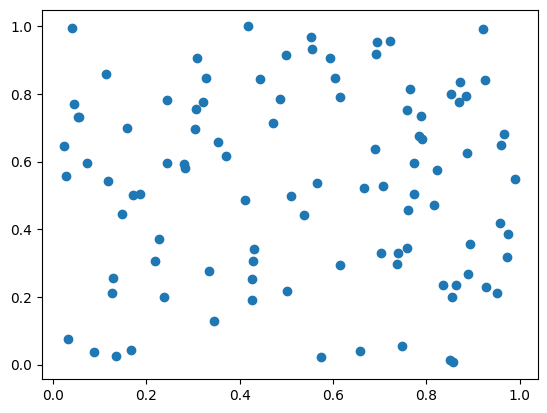

In [36]:
import matplotlib.pyplot as plt # グラフにプロットする機能をインポートし、pltの省略形として呼べるようにする
 
plt.scatter(x, y) # 乱数で作ったxとyの配列をplt.scatter(x軸の値, y軸の値)として代入

In [37]:
type(df["hotelMinCharge"][0]) # type(ここに判別したい変数)とするとその変数のデータ型がわかります。

str

In [41]:
# 文字列を数字のデータ型に変換する時はint(変換したい変数)とすると数字のデータ型に変換できます。
int(df["hotelMinCharge"][0])


3200

In [42]:
# 足し算して数字として扱われているかを確認しましょう。
int(df["hotelMinCharge"][0]) + int(df["hotelMinCharge"][1])

7746

In [43]:
x = [] # 数字に変換したホテル料金を追加するための空配列
y = [] # 数字に変換したホテル評価を追加するための空配列

for i in range(0 ,len(df)):
    a1 = int(df["hotelMinCharge"][i]) # ホテル料金を数字の型に変換
    a2 = float(df["reviewAverage"][i]) # ホテル評価を数字の型に変換

    # -1として入力した欠損したホテル料金データを条件で追加処理しない事で、排除します。
    if (a1 > 0):
        x.append(a1) # xに数字に変換したホテル料金を追加
        y.append(a2) # yに数字に変換したホテル評価を追加

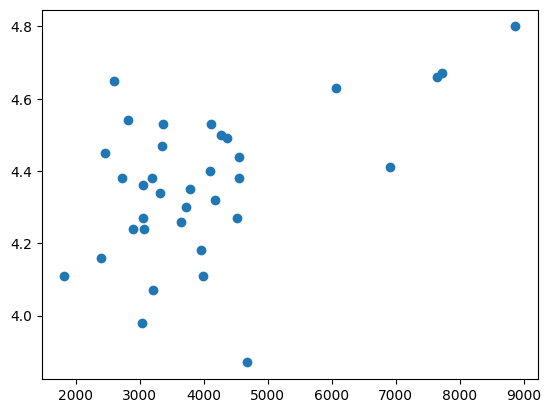

In [44]:
plt.scatter(x, y) # 用意したxとyの配列をplt.scatter(x軸の値, y軸の値)として代入